In [84]:
# Learning Practice 7 for the University of Tulsa's QM-7063 Data Mining Course
# Classification and Regression Trees
# # Professor: Dr. Abdulrashid, Spring 2023
# Noah L. Schrick - 1492657

%matplotlib inline

from pathlib import Path
import matplotlib.pylab as plt

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn import tree
import scikitplot as skplt
from dmba import classificationSummary
from dmba import plotDecisionTree


# Problem 9.1

Competitive Auctions on eBay.com. 

The file eBayAuctions.csv contains information on 1972 auctions that transacted on eBay.com during May–June 2004. The goal is to use these data to build a model that will classify auctions as competitive or non-competitive. A competitive auction is defined as an auction with at least two bids placed on the item auctioned. The data include variables that describe the item (auction category), the seller (his/her eBay rating), and the auction terms that the seller selected (auction duration, opening price, currency, day-of-week of auction close). In addition, we have the price at which the auction closed. The task is to predict whether or not the auction will be competitive. 

Data Preprocessing. 
Convert variable Duration into a categorical variable. Split the data into training (60%) and validation (40%) datasets. 

a. Fit a classification tree using all predictors. To avoid overfitting, set the minimum number of records in a terminal node to 50 and the maximum tree depth to 7. Write down the results in terms of rules. (Note: If you had to slightly reduce the number of predictors due to software limitations, or for clarity of presentation, which would be a good variable to choose?)
b. Is this model practical for predicting the outcome of a new auction? 
c. Describe the interesting and uninteresting information that these rules provide.
d. Fit another classification tree (using a tree with a minimum number of records per terminal node = 50 and maximum depth = 7), this time only with predictors that can be used for predicting the outcome of a new auction. Describe the resulting tree in terms of rules. Make sure to report the smallest set of rules required for classification.
e. Plot the resulting tree on a scatter plot: Use the two axes for the two best (quantitative) predictors. Each auction will appear as a point, with coordinates corresponding to its values on those two predictors. Use different colors or symbols to separate competitive and noncompetitive auctions. Draw lines (you can sketch these by hand or use Python) at the values that create splits. Does this splitting seem
reasonable with respect to the meaning of the two predictors? Does it seem to do a good job of separating the two classes?
f. Examine the lift chart and the confusion matrix for the tree. What can you say about the predictive performance of this model?
g. Based on this last tree, what can you conclude from these data about the chances of an auction obtaining at least two bids and its  relationship to the auction settings set by the seller (duration, opening price, ending day, currency)? What would you recommend for a seller as the strategy that will most likely lead to a competitive auction?

In [28]:
# Data pre-processing
auction_df = pd.read_csv('eBayAuctions.csv')

# Convert cols to categorical
auction_df['Duration'] = auction_df['Duration'].astype('category')
auction_df = pd.get_dummies(auction_df, prefix_sep='_', drop_first=True)

# Spec outcome
X = auction_df.drop(columns=['Competitive?'])
y = auction_df['Competitive?']
# 60/40 split
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [20]:
# a
fullClassTree = DecisionTreeClassifier(random_state=1, min_samples_leaf=50, max_depth=7)
fullClassTree.fit(train_X, train_y)
tree_rules = export_text(fullClassTree, feature_names=list(train_X.columns))
print(tree_rules)


|--- OpenPrice <= 3.62
|   |--- ClosePrice <= 3.64
|   |   |--- OpenPrice <= 1.03
|   |   |   |--- class: 1
|   |   |--- OpenPrice >  1.03
|   |   |   |--- OpenPrice <= 2.45
|   |   |   |   |--- class: 0
|   |   |   |--- OpenPrice >  2.45
|   |   |   |   |--- class: 0
|   |--- ClosePrice >  3.64
|   |   |--- Duration_10 <= 0.50
|   |   |   |--- class: 1
|   |   |--- Duration_10 >  0.50
|   |   |   |--- class: 1
|--- OpenPrice >  3.62
|   |--- ClosePrice <= 10.00
|   |   |--- OpenPrice <= 4.97
|   |   |   |--- class: 0
|   |   |--- OpenPrice >  4.97
|   |   |   |--- ClosePrice <= 6.82
|   |   |   |   |--- class: 0
|   |   |   |--- ClosePrice >  6.82
|   |   |   |   |--- OpenPrice <= 7.99
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- OpenPrice >  7.99
|   |   |   |   |   |--- class: 0
|   |--- ClosePrice >  10.00
|   |   |--- OpenPrice <= 10.97
|   |   |   |--- OpenPrice <= 9.89
|   |   |   |   |--- class: 1
|   |   |   |--- OpenPrice >  9.89
|   |   |   |   |--- class: 1
|   | 

# If you had to slightly reduce the number of predictors due to software limitations, or for clarity of presentation, which would be a good variable to choose?
Category and Currency

In [24]:
# b
classificationSummary(valid_y, fullClassTree.predict(valid_X))

Confusion Matrix (Accuracy 0.8162)

       Prediction
Actual   0   1
     0 305  48
     1  97 339


# b. Is this model practical for predicting the outcome of a new auction? 
This model works well for the dataset provided, but is not practical. The primary issue is that this model uses closePrice to predict the outcome, and closePrice is not something known in advance. In addition, for this set of data, the tree is quick to build and use, and has a 81.62% accuracy. However, many of the rules appear overfitted for the data provided.

# c. Describe the interesting and uninteresting information that these rules provide.
Of interest:
    The tree starts the split with OpenPrice, and is able to cleanly make a binary split.

Not of interest:
    If the OpenPrice > 3.62, the next split is based on ClosePrice. However, it "splits" into a "0" category, meaning ClosePrice does not apply much to the training data. From here, the rules appear overfitted, choosing various price points to split at.

In [56]:
# d
auction_df_2 = pd.read_csv('eBayAuctions.csv')

# Convert cols to categorical
auction_df_2['Duration'] = auction_df_2['Duration'].astype('category')
auction_df_2 = pd.get_dummies(auction_df_2, drop_first=True)

# Spec outcome
X_2 = auction_df_2.drop(list(auction_df_2.filter(regex = 'Category')), axis = 1)
X_2 = X_2.drop(list(X_2.filter(regex = 'currency')), axis = 1)
X_2 = X_2.drop(list(X_2.filter(regex = 'Competitive?')), axis = 1)
X_2 = X_2.drop(list(X_2.filter(regex = 'ClosePrice')), axis = 1)
y_2 = auction_df_2['Competitive?']

# 60/40 split
train_X_2, valid_X_2, train_y_2, valid_y_2 = train_test_split(X_2, y_2, test_size=0.4, random_state=1)

fullClassTree_2 = DecisionTreeClassifier(random_state=1, min_samples_leaf=50, max_depth=7)
fullClassTree_2.fit(train_X_2, train_y_2)
tree_rules_2 = export_text(fullClassTree_2, feature_names=list(train_X_2.columns))
print(tree_rules_2)

|--- OpenPrice <= 3.62
|   |--- OpenPrice <= 1.04
|   |   |--- sellerRating <= 3138.50
|   |   |   |--- class: 1
|   |   |--- sellerRating >  3138.50
|   |   |   |--- class: 1
|   |--- OpenPrice >  1.04
|   |   |--- sellerRating <= 2365.50
|   |   |   |--- sellerRating <= 1099.50
|   |   |   |   |--- sellerRating <= 493.50
|   |   |   |   |   |--- sellerRating <= 102.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- sellerRating >  102.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- sellerRating >  493.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- sellerRating >  1099.50
|   |   |   |   |--- OpenPrice <= 3.32
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- OpenPrice >  3.32
|   |   |   |   |   |--- class: 1
|   |   |--- sellerRating >  2365.50
|   |   |   |--- class: 0
|--- OpenPrice >  3.62
|   |--- sellerRating <= 601.50
|   |   |--- sellerRating <= 128.00
|   |   |   |--- class: 1
|   |   |--- sellerRating >  128.00
|   |   |   |--- class

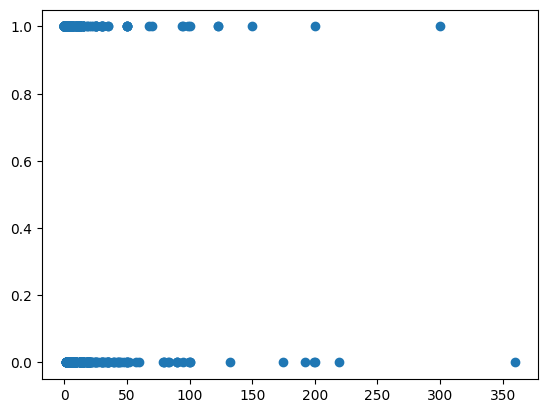

In [116]:
# e Plot the resulting tree on a scatter plot
#plt.scatter(X_2, y_2)
preds = fullClassTree_2.predict(valid_X_2)
plt.scatter(valid_X_2['OpenPrice'], preds)

# len(X_2) == len(y_2)
# Is splitting reasonable?

Confusion Matrix (Accuracy 0.7148)

       Prediction
Actual   0   1
     0 222 131
     1  94 342


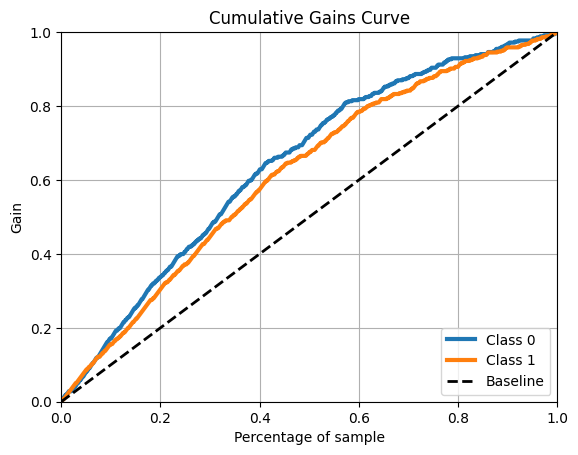

In [75]:
# f lift chart and the confusion matrix
classificationSummary(valid_y_2, fullClassTree_2.predict(valid_X_2))
preds = fullClassTree_2.predict_proba(valid_X_2)

skplt.metrics.plot_cumulative_gain(valid_y_2, preds)
plt.show()

# g. Based on this last tree, what can you conclude from these data about the chances of an auction obtaining at least two bids and its  relationship to the auction settings set by the seller (duration, opening price, ending day, currency)? What would you recommend for a seller as the strategy that will most likely lead to a competitive auction?

For sellers with both a high rating and a low rating, the best strategy for a competitive auction is to have a lower OpenPrice. Starting with a higher OpenPrice, though possible for highly rated sellers, tends to result in an auction with one bid.

# Problem 9.3

Predicting Prices of Used Cars (Regression Trees). 

The file ToyotaCorolla.csv contains the data on used cars (Toyota Corolla) on sale during late summer of 2004 in the Netherlands. It has 1436 records containing details on 38 attributes, including Price, Age, Kilometers, HP, and other specifications. The goal is to predict the price
of a used Toyota Corolla based on its specifications. (The example in Section 9.7 is a subset of this dataset.) 

Data Preprocessing. Split the data into training (60%), and validation (40%) datasets.

a. Run a full-grown regression tree (RT) with outcome variable Price and predictors Age_08_04, KM, Fuel_Type (first convert to dummies), HP, Automatic, Doors, Quarterly_Tax, Mfr_Guarantee, Guarantee_Period, Airco, Automatic_airco, CD_Player, Powered_Windows, Sport_Model, and Tow_Bar. Set random_state=1.
    i. Which appear to be the three or four most important car specifications for predicting the car’s price?
    ii. Compare the prediction errors of the training and validation sets by examining their RMS error and by plotting the two boxplots. How does the predictive performance of the validation set compare to the training set? Why does this occur?
    iii. How might we achieve better validation predictive performance at the expense of training performance?
    iv. Create a smaller tree by using GridSearchCV() with cv = 5 to find a fine-tuned tree. Compared to the full-grown tree, what is the predictive performance on the validation set?
b. Let us see the effect of turning the price variable into a categorical variable. First, create a new variable that categorizes price into 20 bins. Now repartition the data keeping Binned_Price instead of Price. Run a classification tree with the same set of input variables as in the RT, and with Binned_Price as the output variable. As in the less deep regression tree, create a smaller tree by using GridSearchCV() with
cv = 5 to find a fine-tuned tree.
    i. Compare the smaller tree generated by the CT with the smaller tree generated by RT. Are they different? (Look at structure, the top predictors, size of tree, etc.) Why?
    ii. Predict the price, using the smaller RT and CT, of a used Toyota Corolla with the specifications listed in Table 9.10.

        TABLE 9.10 SPECIFICATIONS FOR A PARTICULAR TOYOTA COROLLA
        Variable            Value
        Age_-08_-04         77
        KM                  117,000
        Fuel_Type           Petrol
        HP                  110
        Automatic           No
        Doors               5
        Quarterly_Tax       100
        Mfg_Guarantee       No
        Guarantee_Period    3
        Airco               Yes
        Automatic_airco     No
        CD_Player           No
        Powered_Windows     No
        Sport_Model         No
        Tow_Bar             Yes

    iii. Compare the predictions in terms of the predictors that were used, the magnitude of the difference between the two predictions, and the advantages and disadvantages of the two methods.

In [76]:
# Pre-processing
orig_auction_df = pd.read_csv('eBayAuctions.csv')
auction_df = pd.read_csv('eBayAuctions.csv')
auction_df.columns = [c.replace(' ', '_') for c in auction_df.columns]

auction_df['Duration'] = auction_df['Duration'].astype('category')

auction_df['currency'] = auction_df['currency'].astype('category')
new_categories = {1: 'USD', 2: 'GBP', 3: 'Euro'}
auction_df.currency.cat.rename_categories(new_categories, inplace=True)
auction_df = pd.get_dummies(auction_df, prefix_sep='_', drop_first=True)

category_cols = [col for col in auction_df.columns if 'Category_' in col]
endDay_cols = [col for col in auction_df.columns if 'endDay_' in col]

for col in category_cols:
    auction_df[col] = auction_df[col].astype('category')

for col in endDay_cols:
    auction_df[col] = auction_df[col].astype('category')


/tmp/ipykernel_27606/691198861.py:10: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  auction_df.currency.cat.rename_categories(new_categories, inplace=True)


In [90]:
# a
dur_pivot = orig_auction_df.pivot_table(index =['Duration'],
                                    values =['Competitive?'],
                                    aggfunc ='mean')
print(dur_pivot)

cur_pivot = orig_auction_df.pivot_table(index =['currency'],
                                    values =['Competitive?'],
                                    aggfunc ='mean')
print(cur_pivot)

for col in endDay_cols:
    date_pivot = auction_df.pivot_table(index = [col],
                                        values =['Competitive?'],
                                        aggfunc ='mean')
    print(date_pivot)

for col in category_cols:
    cat_pivot = auction_df.pivot_table(index = [col],
                                        values =['Competitive?'],
                                        aggfunc ='mean')
    print(cat_pivot)


          Competitive?
Duration              
1             0.521739
3             0.450704
5             0.686695
7             0.489142
10            0.544554
          Competitive?
currency              
EUR           0.551595
GBP           0.687075
US            0.519350
            Competitive?
endDay_Mon              
0               0.489466
1               0.673358
            Competitive?
endDay_Sat              
0               0.565083
1               0.427350
            Competitive?
endDay_Sun              
0               0.552020
1               0.485207
            Competitive?
endDay_Thu              
0               0.533333
1               0.603960
            Competitive?
endDay_Tue              
0               0.541366
1               0.532164
            Competitive?
endDay_Wed              
0               0.542963
1               0.480000
                     Competitive?
Category_Automotive              
0                        0.559086
1                     

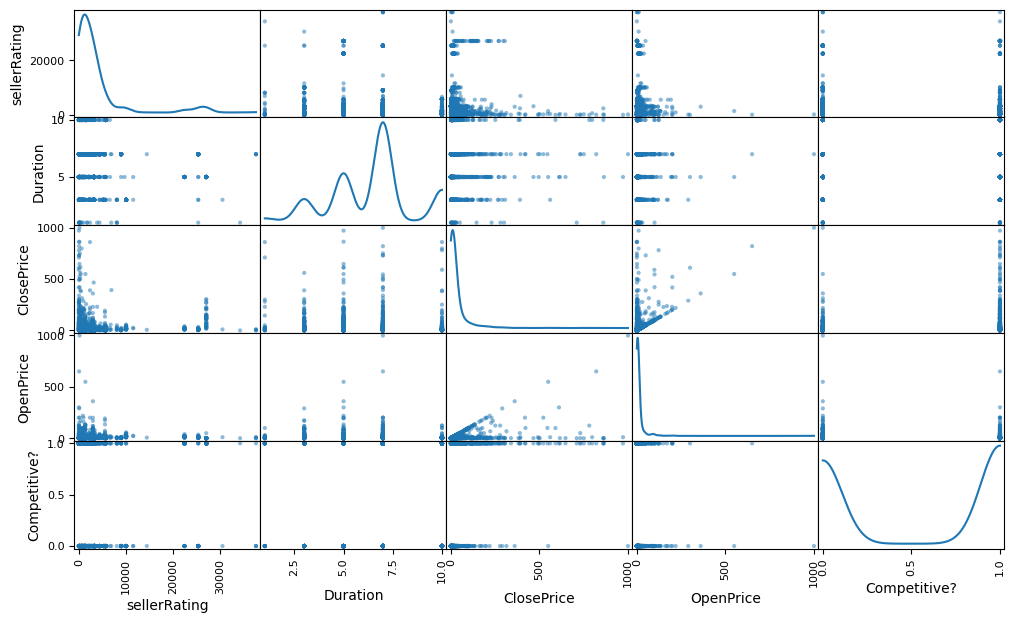

In [93]:
plt=scatter_matrix(orig_auction_df,diagonal='kde',figsize=(12,7))

# Combine open and close price

In [167]:
# b
outcome = auction_df['Competitive?']
predictors = auction_df.drop('Competitive?',axis=1)
X = auction_df.drop(columns=['Competitive?'])


df_dummies=pd.get_dummies(predictors,drop_first=True)
#df_dummies.insert(0,'Intercept',[1]*len(df_dummies))

train_X,valid_X,train_y,valid_y=train_test_split(df_dummies,outcome,test_size=0.40, random_state=1)
train_X_p = train_X
valid_X_p = valid_X


logit_full_p = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_full_p.fit(train_X, train_y)

logit_reg_pred_p = logit_full_p.predict_proba(valid_X)
full_result_p = pd.DataFrame({'actual': valid_y, 
                            'p(0)': [p[0] for p in logit_reg_pred_p],
                            'p(1)': [p[1] for p in logit_reg_pred_p],
                            'predicted': logit_full_p.predict(valid_X)})
full_result_p = full_result_p.sort_values(by=['p(1)'], ascending=False)
print(full_result_p)

num_corr = 0
total = 0
for index, row in full_result_p.iterrows():    
    if (row['actual'] == row['predicted']):
        num_corr += 1
        total += 1
    else:
        total += 1

inc_price_pctg = num_corr/total*100.00

print("Classified Correctly:", inc_price_pctg, "%")

      actual      p(0)      p(1)  predicted
480        1  0.000000  1.000000          1
512        1  0.000000  1.000000          1
1664       1  0.000000  1.000000          1
1704       1  0.000000  1.000000          1
1963       1  0.000000  1.000000          1
...      ...       ...       ...        ...
1863       0  0.963370  0.036630          0
1960       0  0.979843  0.020157          0
1955       0  0.995957  0.004043          0
1952       0  0.996900  0.003100          0
1967       0  0.998912  0.001088          0

[789 rows x 4 columns]
Classified Correctly: 76.1723700887199 %


In [130]:
# c
new_predictors = predictors.drop('ClosePrice',axis=1)

df_dummies=pd.get_dummies(new_predictors,drop_first=True)
df_dummies.insert(0,'Intercept',[1]*len(df_dummies))

train_X,valid_X,train_y,valid_y=train_test_split(df_dummies,outcome,test_size=0.40, random_state=1)

logit_full = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_full.fit(train_X, train_y)

logit_reg_pred = logit_full.predict_proba(valid_X)
full_result = pd.DataFrame({'actual': valid_y, 
                            'p(0)': [p[0] for p in logit_reg_pred],
                            'p(1)': [p[1] for p in logit_reg_pred],
                            'predicted': logit_full.predict(valid_X)})
full_result = full_result.sort_values(by=['p(1)'], ascending=False)
print(full_result)

num_corr = 0
total = 0
for index, row in full_result.iterrows():    
    if (row['actual'] == row['predicted']):
        num_corr += 1
        total += 1
    else:
        total += 1

not_inc_price_pctg = num_corr/total*100.00
print("Classified Correctly:", not_inc_price_pctg, "%")
   

print("When not including close price, the model is", inc_price_pctg/not_inc_price_pctg, "times worse")

      actual      p(0)      p(1)  predicted
1772       0  0.030589  0.969411          1
852        1  0.083026  0.916974          1
955        1  0.096801  0.903199          1
1836       1  0.097049  0.902951          1
1622       1  0.099306  0.900694          1
...      ...       ...       ...        ...
1081       1  0.910252  0.089748          0
348        0  0.910385  0.089615          0
1237       1  0.910617  0.089383          0
1955       0  0.940586  0.059414          0
1952       0  0.963785  0.036215          0

[789 rows x 4 columns]
Classified Correctly: 63.37135614702155 %
When not including close price, the model is 1.202 times worse


In [132]:
# d
print('intercept ', logit_full_p.intercept_[0])
print(pd.DataFrame({'coeff': logit_full_p.coef_[0]}, index=X.columns).transpose())


intercept  -0.36315695612599685
       sellerRating  ClosePrice  OpenPrice  Category_Automotive  \
coeff     -0.000046    0.088855  -0.105865             1.758587   

       Category_Books  Category_Business/Industrial  \
coeff        0.557255                      -0.08761   

       Category_Clothing/Accessories  Category_Coins/Stamps  \
coeff                       0.323714              -0.033867   

       Category_Collectibles  Category_Computer  ...  Duration_3  Duration_5  \
coeff               0.171399          -0.609743  ...    1.256207   -0.108202   

       Duration_7  Duration_10  endDay_Mon  endDay_Sat  endDay_Sun  \
coeff   -0.186949     0.315695    0.280735   -0.612956   -0.468657   

       endDay_Thu  endDay_Tue  endDay_Wed  
coeff    -0.56343   -0.198906   -0.712514  

[1 rows x 32 columns]


# Closing Price
The coefficient of closing price indicates that it has a positive effect on competitiveness. The coefficient is 0.089, which is considered statistically significant when using a p-value of 0.1.

In [173]:
# e
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_step_model, best_step_variables = stepwise_selection(train_X_p.columns, train_model, score_model, verbose=True)
print(best_step_variables)


Variables: sellerRating, ClosePrice, OpenPrice, currency_GBP, currency_US, Duration_3, Duration_5, Duration_7, Duration_10, Category_Automotive_1, Category_Books_1, Category_Business/Industrial_1, Category_Clothing/Accessories_1, Category_Coins/Stamps_1, Category_Collectibles_1, Category_Computer_1, Category_Electronics_1, Category_EverythingElse_1, Category_Health/Beauty_1, Category_Home/Garden_1, Category_Jewelry_1, Category_Music/Movie/Game_1, Category_Photography_1, Category_Pottery/Glass_1, Category_SportingGoods_1, Category_Toys/Hobbies_1, endDay_Mon_1, endDay_Sat_1, endDay_Sun_1, endDay_Thu_1, endDay_Tue_1, endDay_Wed_1
Start: score=1716.20, constant
Step: score=1676.05, add endDay_Mon_1
Step: score=1645.10, add ClosePrice
Step: score=1599.18, add OpenPrice
Step: score=1571.92, add Category_Health/Beauty_1
Step: score=1551.14, add currency_GBP
Step: score=1536.20, add Category_Coins/Stamps_1
Step: score=1524.50, add Category_Automotive_1
Step: score=1519.89, add Duration_5
Step:

In [175]:
print("LASSO")
lasso = Lasso(alpha=1)
lasso.fit(train_X, train_y)
regressionSummary(valid_y, lasso.predict(valid_X))
print("\n")

print("LASSO CV")
lasso_cv = LassoCV(cv=5)
lasso_cv.fit(train_X, train_y)
regressionSummary(valid_y, lasso_cv.predict(valid_X))
print('Lasso-CV chosen regularization: ', lasso_cv.alpha_)


LASSO

Regression statistics

               Mean Error (ME) : 0.0219
Root Mean Squared Error (RMSE) : 0.4804
     Mean Absolute Error (MAE) : 0.4766


LASSO CV

Regression statistics

               Mean Error (ME) : 0.0218
Root Mean Squared Error (RMSE) : 0.4813
     Mean Absolute Error (MAE) : 0.4776
Lasso-CV chosen regularization:  1.242215531068193


In [176]:
# f
print("RIDGE")
ridge = Ridge(alpha=1)
ridge.fit(train_X, train_y)
regressionSummary(valid_y, ridge.predict(valid_X))
print("\n")

print("BAYESIAN RIDGE")
bayesianRidge = BayesianRidge()
bayesianRidge.fit(train_X, train_y)
regressionSummary(valid_y, bayesianRidge.predict(valid_X))
print('Bayesian ridge chosen regularization: ', bayesianRidge.lambda_ / bayesianRidge.alpha_)
print("\n")

RIDGE

Regression statistics

               Mean Error (ME) : 0.0172
Root Mean Squared Error (RMSE) : 0.4623
     Mean Absolute Error (MAE) : 0.4303


BAYESIAN RIDGE

Regression statistics

               Mean Error (ME) : 0.0179
Root Mean Squared Error (RMSE) : 0.4607
     Mean Absolute Error (MAE) : 0.4367
Bayesian ridge chosen regularization:  16.53562606806346




# Best Model
RIDGE: Lowest ME (0.0172), lowest MAE (0.4303), second lowest RMSE (0.4623)

# g
The biggest concern with using Bayesian Ridge Regression is that the underlying model assumes a linear relationship. This linear relationship is not able to capture the logistic regression fit and accurately map all outcomes, as indicated by the high MAE and RMSE.

# h
The best-fitting models and the best predictive models can often differ due to many factors. A model that fits very well to the training data may be overfitted, leading to poor results when predicting future, unknown data. The best predictive model on the test data set may be too simplistic, and fail to properly represent data with abnormal or unique behavior unseen from the model found in the training set. Various errors are a good indicator of where a best-fit model may differ from the best predictive model.

In [178]:
# i
logit_full_1 = LogisticRegression(penalty="l1", C=1e42, solver='liblinear')
logit_full_1.fit(train_X, train_y)

logit_reg_pred_1 = logit_full_1.predict_proba(valid_X)
full_result_1 = pd.DataFrame({'actual': valid_y, 
                            'p(0)': [p[0] for p in logit_reg_pred_1],
                            'p(1)': [p[1] for p in logit_reg_pred_1],
                            'predicted': logit_full_1.predict(valid_X)})
full_result_1 = full_result_1.sort_values(by=['p(1)'], ascending=False)
print(full_result_1)

num_corr = 0
total = 0
for index, row in full_result_1.iterrows():    
    if (row['actual'] == row['predicted']):
        num_corr += 1
        total += 1
    else:
        total += 1

pctg_1 = num_corr/total*100.00
print("Classified Correctly:", pctg_1, "%")

      actual      p(0)      p(1)  predicted
480        1  0.000000  1.000000          1
1661       1  0.000000  1.000000          1
1962       1  0.000000  1.000000          1
1704       1  0.000000  1.000000          1
1664       1  0.000000  1.000000          1
...      ...       ...       ...        ...
1863       0  0.962442  0.037558          0
1960       0  0.978774  0.021226          0
1955       0  0.995925  0.004075          0
1952       0  0.996922  0.003078          0
1967       0  0.998845  0.001155          0

[789 rows x 4 columns]
Classified Correctly: 75.66539923954373 %


<AxesSubplot: xlabel='ClosePrice', ylabel='Competitive?'>

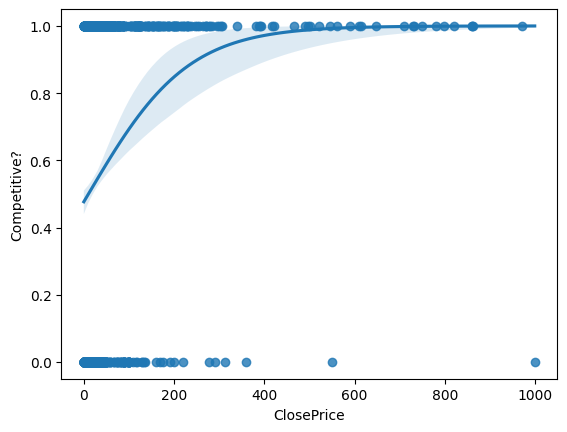

In [189]:
# j
sns.regplot(x='ClosePrice', y='Competitive?', data=auction_df, logistic=True)


# j
This plot alone does not give much insight into a good cutoff value. The logistic regression model is multi-variate, and many variables have differing coefficients. Using PCA, plotting more variables, and varying cutoff values to obtain error rates are necessary to experimentally find a good cutoff value. Using the default of 0.5 suffices for this problem, since the error rates are not abnormally high. Adjusting the cutoff value will alter both the true negative and false positive error rates.

# k
An auction that lasts 10 days contributes most strongly to a competitive auction. The ending day has multiple candidates that all negatively contribute to a competitive auction.